IMPORT PACKAGES

In [1]:
# Basic System Packages
import os
import json
from pprint import pprint

In [2]:
# PyTorch Interface
import torch

In [3]:
# GPT Interface
from openai import OpenAI

In [15]:
# Diffusion Interface
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler

CONFIGURATION

In [5]:
with open('./key.json') as f:
    keys = json.load(f)
    os.environ['OPENAI_API_KEY'] = keys['OPENAI_API_KEY']

In [6]:
client = OpenAI()

In [7]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

PROMPT GENERATION

In [8]:
prompt = 'Draw me an architecture of VGG-16 network'

In [9]:
def generate_cot(base_prompt, keyword):
    prompt = f'''Below is a text rewriting task. Finish it step by step.
    1. Extract key information from the original prompt, such as visual medium and main elements.
    2. You will be given an incomplete text description. Your goal is to provide a compelling continuation of it, while maintaining the distinctive concept called {keyword}.
    3. Extract additional concepts from the extended prompt and emphasize crucial concepts.
    4. With improved key information and crucial concepts, generate a fluent prompt, remaining to be aligned.
    5. Try your best to rewrite it maintaining the distinctive concept called {keyword}.
    ### Input: {base_prompt}
    ### Output: 
    '''

    completion = client.chat.completions.create(
        model = 'gpt-4o',
        messages = [
            {
                'role': 'system',
                'content': 'You are a helpful assistant.'
            },
            {
                'role': 'user',
                'content': prompt
            }
        ]
    )

    return completion.choices[0].message.content

In [10]:
out = generate_cot(prompt, 'VGG-16')

In [11]:
pprint(out)

("Certainly! Let's approach the task methodically, step by step:\n"
 '\n'
 '### Step 1: Extract Key Information\n'
 '- **Visual Medium**: Architecture design/drawing.\n'
 '- **Main Elements**: VGG-16 network structure.\n'
 '\n'
 '### Step 2: Incomplete Text Description\n'
 "Let's assume the task has provided a brief description:\n"
 '"The VGG-16 is a convolutional neural network that has 16 layers. It is '
 'known for its simplicity and effectiveness in image classification tasks."\n'
 '\n'
 '### Step 3: Extract Additional Concepts\n'
 '- **Simplistic Design**: VGG-16 is known for its uniform architecture which '
 'makes it easier to implement.\n'
 '- **Layer Types and Arrangement**: The specifics of its layers, such as '
 'convolutional, pooling, and fully connected layers.\n'
 '- **Image Processing**: Used primarily for tasks involving image '
 'recognition.\n'
 '\n'
 '### Step 4: Improved Key Information\n'
 '- **Convolutional Layers**: Multiple convolutional layers (3x3 filters) ma

In [16]:
pipe = DiffusionPipeline.from_pretrained('stabilityai/stable-diffusion-2-base', torch_dtype = torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to(device)

Loading pipeline components...: 100%|██████████| 6/6 [00:01<00:00,  3.52it/s]


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.30.3",
  "_name_or_path": "stabilityai/stable-diffusion-2-base",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DPMSolverMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Token indices sequence length is longer than the specified maximum sequence length for this model (129 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['effectively downsample spatial information , ensuring the essence and effectiveness of the vgg - 1 6 model are preserved ." by following these steps , the prompt maintains focus on the unique vgg - 1 6 architecture and conveys the importance of its structural design elements .']
100%|██████████| 50/50 [00:03<00:00, 14.68it/s]


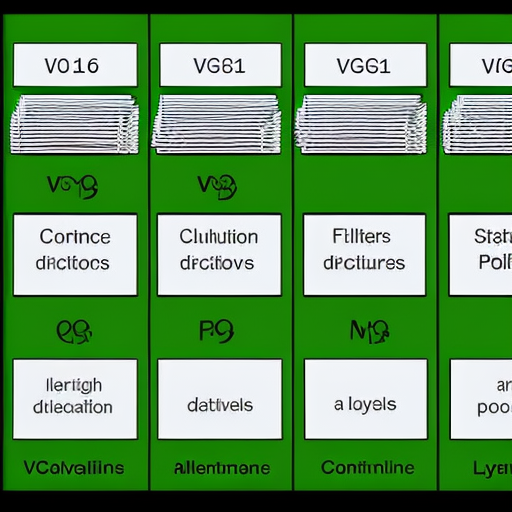

In [18]:
pipe('Illustrate the VGG-16 network architecture by capturing its foundational '
 'simplicity and distinctive design. Highlight how its 16 layers are '
 'systematically structured with alternating convolutional and pooling layers, '
 'culminating in fully connected layers that excel in image classification '
 'tasks. Clearly depict the convolutional layer strategy using 3x3 filters and '
 'the max-pooling components that effectively downsample spatial information, '
 'ensuring the essence and effectiveness of the VGG-16 model are preserved."\n'
 '\n'
 'By following these steps, the prompt maintains focus on the unique VGG-16 '
 'architecture and conveys the importance of its structural design elements.').images[0]